<a href="https://colab.research.google.com/github/stebonomo89/Zalando-images-CNN-project/blob/main/Deep_Learning_CNN_project_Zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Class Classification with Convolutional Neural Network
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60k examples and a test set of 10k examples. 
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels. 
Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

Dataset available at Zalando's page, at this link: https://github.com/zalandoresearch/ 


Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

The goal of this project is to create a model that given a new image, it is able to recognize the correspondent category(label)





In [ ]:
#Loading dataset with images:

from tensorflow.keras.datasets import fashion_mnist 

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
x_train.shape, 


((60000, 28, 28),)

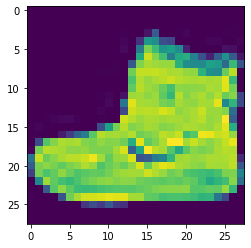

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

9

Transforming numeric label y to categorical in order to feed them into the convolutional model

In [ ]:


from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test)

In [ ]:
x_train.max(), x_train.min()

(255, 0)

In [ ]:
x_train = x_train/255     #as all images are RGB constructed, they all have values between 0 and 255
x_test = x_test/255       #so we can easily normalize them by dividing for the max(255

Adding one more dimension to the shape in order to let the convolutional network know that we are dealing with a single RGB channel

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)  #represents the batch size

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28))

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1)

Now we can create our model 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))  
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax')) #softmax as it is a multiclass classification problem

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               589952    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

Training the model

In [ ]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4056 - accuracy: 0.8558 - val_loss: 0.3263 - val_accuracy: 0.8872
Epoch 2/3
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2812 - accuracy: 0.8983 - val_loss: 0.2908 - val_accuracy: 0.8932
Epoch 3/3
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2365 - accuracy: 0.9119 - val_loss: 0.2718 - val_accuracy: 0.9003


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
import pandas as pd
metrics =pd.DataFrame(model.history.history)


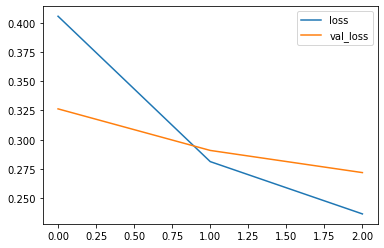

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 2s 7ms/step


In [ ]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.80      0.84      1000
           3       0.87      0.94      0.90      1000
           4       0.84      0.85      0.85      1000
           5       0.99      0.96      0.98      1000
           6       0.72      0.72      0.72      1000
           7       0.95      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



The report shows an average F1-score of 90% so we can be satisfied with the accuracy reached.

In [ ]:
import seaborn as sns

In [ ]:
confusion_matrix(y_test, predictions)

array([[861,   0,   9,  22,   3,   0,  99,   0,   6,   0],
       [  5, 966,   0,  21,   3,   0,   4,   0,   1,   0],
       [ 14,   0, 802,  10,  82,   0,  92,   0,   0,   0],
       [ 13,   3,   7, 939,   4,   0,  33,   0,   1,   0],
       [  0,   1,  45,  54, 849,   0,  50,   0,   1,   0],
       [  0,   0,   0,   0,   0, 959,   0,  26,   0,  15],
       [128,   0,  47,  31,  65,   0, 723,   0,   6,   0],
       [  0,   0,   0,   0,   0,   4,   0, 943,   0,  53],
       [  3,   0,   1,   2,   3,   1,   3,   4, 983,   0],
       [  0,   0,   0,   0,   0,   3,   1,  18,   0, 978]])

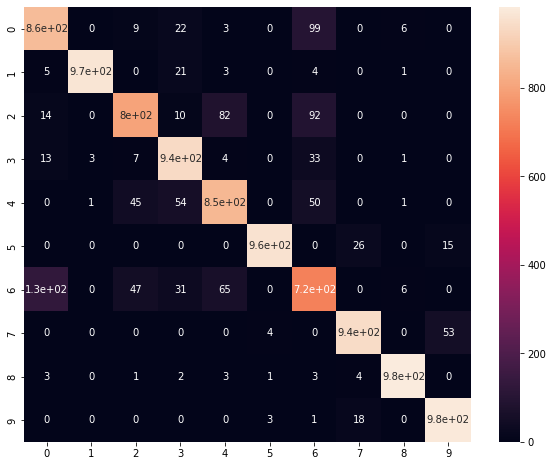

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

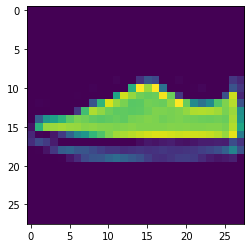

In [ ]:
image = x_train[20000]   # try to test the model predicting the label of a single image 
plt.imshow(image)

In [ ]:
image =image.reshape(1,28,28,1)

In [ ]:
image_predict= np.argmax(model.predict(image), axis=-1)

1/1 [==============================] - 0s 27ms/step


In [ ]:
image_predict

array([7])

In [ ]:
#label 7 corresponds to sneakers, so the model worked well being able to predict it correctly.